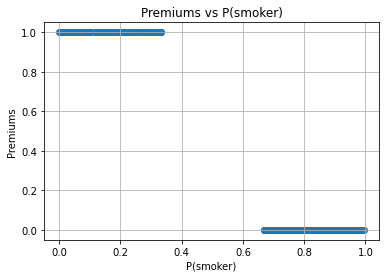

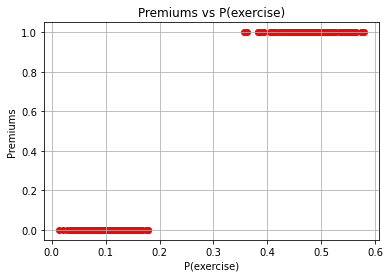

In [9]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#reading data from excel
df1= pd.read_excel('assig#3.xlsx')

#Coverting categorical data to binary form 
df2=pd.get_dummies(df1['Premiums'])
df = pd.concat((df2, df1), axis=1)
df = df.drop(["Premiums"], axis=1)
df = df.drop(["Low"], axis=1)
result = df.rename(columns={"High": "Premiums"})
y=result['Premiums']
x1=result['P(smoker)']
x2=result['P(exercise)']
#Plotting the data 
plt.grid()
plt.scatter(x1,y)
plt.title("Premiums vs P(smoker)")
plt.ylabel("Premiums")
plt.xlabel("P(smoker)")
plt.show()
plt.grid()
plt.scatter(x2,y,c='red')
plt.title("Premiums vs P(exercise)")
plt.ylabel("Premiums")
plt.xlabel("P(exercise)")
plt.show()

In [10]:
#logistic reression funtion
def logistic_Regression(X,Y,lr,itr):
    m=0
    b=0
    for i in range(itr):
        y_hat=sigmoid(X,m,b)
        #Gradient descent
        delJ_m=-2*sum((Y-y_hat)*y_hat*(1-y_hat)*X)
        delJ_b=-2*sum((Y-y_hat)*y_hat*(1-y_hat))
        #updating the m & b values
        m=m-lr*delJ_m
        b=b-lr*delJ_b
    return m,b
    
#sigmoid function
def sigmoid(X,m,b):
    for x in X:
        return 1/(1+np.exp((-1*m*X)-(1*b)))

#Confusion Matrix
def confusionMatrix(yPred,y):
    matrix=np.matrix([[0,0],[0,0]])
    for i in range(len(yPred)):
        #True Positives
        if int(yPred[i])==1 and int(y[i])==1: 
            matrix[0,0]+=1 
        
        #False Positives
        elif int(yPred[i])==0 and int(y[i])==1:
            matrix[0,1]+=1 
            
        #False Negatives
        elif int(yPred[i])==1 and int(y[i])==0:
            matrix[1,0]+=1 
            
        #True Negatives
        elif int(yPred[i])==0 and int(y[i])==0:
            matrix[1,1]+=1 

    TP = matrix[0,0]
    FP = matrix[0,1]
    FN = matrix[1,0]
    TN = matrix[1,1]
    Total=len(y)
    
    print("Confusion Matrix:\n",matrix)
    
    
    accuracy=(TP+TN)/Total
    print("\nAccuracy:",accuracy)
    
    misclassification=(FP+FN)/Total
    print("\nMisclassification:",misclassification)
    
    prevalence=(TP+FN)/Total
    print("\nPrevalence:",prevalence)
    
    precision=TP/(TP+FP)
    print("\nPrecision:",precision)
    
    recall=TP/(TP+FN)
    print("\nRecall:",recall)
    
    null_error_rate=(TN+FP)/Total
    print("\nNull Error Rate:",null_error_rate)

    f1=2*(precision*recall)/(precision+recall)
    print("\nF1 score:",f1)
    
    balance_accuracy=(TP+TN)/2
    print("\nBalance Accuracy:",balance_accuracy)
    
    roc=((FP/(TN+FP)),(TP/(TP+FN)))
    print("\nROC:",roc)
    

    ax = sns.heatmap(matrix, annot=True, cmap='Blues',fmt='g')
    ax.set_title('Confusion Matrix\n')
    ax.set_xlabel('\nActual Values')
    ax.set_ylabel('Predicted Values ')

## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
    plt.show()

Confusion Matrix:
 [[164   0]
 [  0 162]]

Accuracy: 1.0

Misclassification: 0.0

Prevalence: 0.5030674846625767

Precision: 1.0

Recall: 1.0

Null Error Rate: 0.49693251533742333

F1 score: 1.0

Balance Accuracy: 163.0

ROC: (0.0, 1.0)


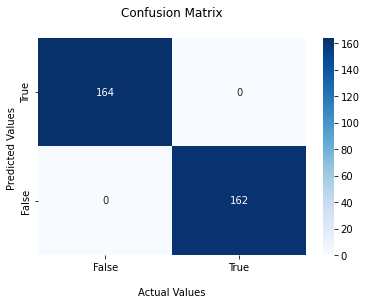

Slope: -11.39652556849343
Intercept: 5.602360996874172


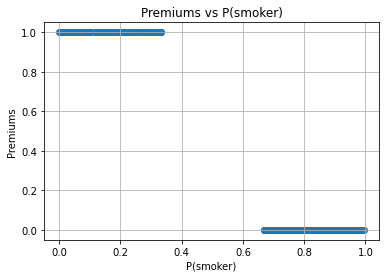

In [11]:
#Using logistic regression for p(smoker)
m1,b1=logistic_Regression(x1,y,0.01,1000)
y_hat1=sigmoid(x1,m1,b1)
y_p1=[]
for i in y_hat1:
    if i >= 0.5:
        y_hat1=1
    else: 
        y_hat1=0
    y_p1=np.append(y_p1,y_hat1)
    
confusion_matrix1=confusionMatrix(y_p1,y)
plt.grid()
plt.scatter(x1,y_p1)
plt.title("Premiums vs P(smoker)")
plt.ylabel("Premiums")
plt.xlabel("P(smoker)")
print("Slope: " +str(m1)+"\nIntercept: " +str(b1))


Confusion Matrix:
 [[164   0]
 [  2 160]]

Accuracy: 0.9938650306748467

Misclassification: 0.006134969325153374

Prevalence: 0.50920245398773

Precision: 1.0

Recall: 0.9879518072289156

Null Error Rate: 0.49079754601226994

F1 score: 0.993939393939394

Balance Accuracy: 162.0

ROC: (0.0, 0.9879518072289156)


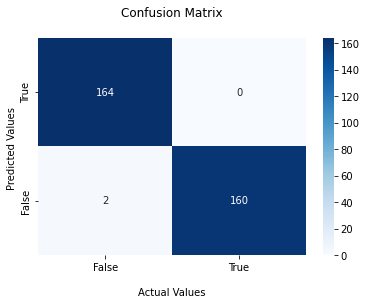

7.230019592503717 -2.1217447040790085


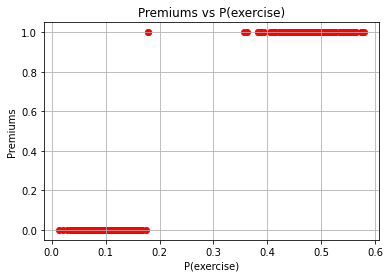

In [12]:
# Using Logistic Regression for P(exercise)
m2,b2=logistic_Regression(x2,y,0.001,1000)
y_hat2=sigmoid(x2,m2,b2)
y_p2=[]
for i in y_hat2:
    if i >= 0.3:
        y_hat2=1
    else: 
        y_hat2=0
    y_p2=np.append(y_p2,y_hat2)
confusion_matrix2=confusionMatrix(y_p2,y)
plt.grid()
plt.scatter(x2,y_p2,c='red')
plt.title("Premiums vs P(exercise)")
plt.ylabel("Premiums")
plt.xlabel("P(exercise)")
print(m2,b2)

In [13]:
#Reading test data & Converting to series
x1_test=result.iloc[0:166,3:4].squeeze()
x2_test=result.iloc[0:166,4:].squeeze()

Accuracy 0.43373493975903615


Text(0, 0.5, 'Y-Prediciton')

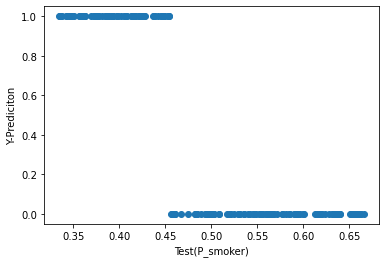

In [14]:
y_test_hat1=sigmoid(x1_test,m1,b1)
y_test_p1=[]
for i in y_test_hat1: 
    if i >= 0.6 :
        y_test_hat1=1
    else: 
        y_test_hat1=0
    
    y_test_p1=np.append(y_test_p1,y_test_hat1)

    #Accuracy check
correct1=0
for i in range(len(y_test_p1)):
    if y_test_p1[i]==y[i]:
        correct1 += 1
accuracy=correct1/len(y_test_p1)
print("Accuracy",accuracy)
    
plt.scatter(x1_test,y_test_p1)
plt.xlabel('Test(P_smoker)')
plt.ylabel('Y-Prediciton')

Accuracy 0.608433734939759


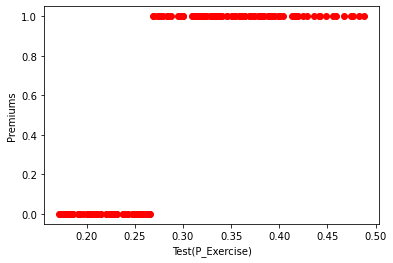

In [15]:
y_test_hat2=sigmoid(x2_test,m2,b2)
y_test_p2=[]
for i in y_test_hat2: 
    if i >= 0.45 :
        y_test_hat2=1
    else: 
        y_test_hat2=0
    
    y_test_p2=np.append(y_test_p2,y_test_hat2)

#Accuracy check
correct2=0
for i in range(len(y_test_p2)):
    if y_test_p2[i]==y[i]:
        correct2 += 1
accuracy2=correct2/len(y_test_p2)
print("Accuracy",accuracy2)
    
plt.scatter(x2_test,y_test_p2,c='red')
plt.xlabel('Test(P_Exercise)')
plt.ylabel('Premiums')
plt.show()
